### Don't change any cell that begins with DNC!  These are here to separate sections so we can grade the assignment more easily.

#### Add your imports in the cell below here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate
%matplotlib inline

## DNC: Begin Part 1

### Part 1: Basic Data Visualization 

#### Plotting x-y data

* Use the HCEPDB file to create a single 4x4 composite plot (_not 4 separate figures_).  The plots should contain the following data
    * Upper-left: PCE vs VOC
    * UR: PCE vs JCS
    * LL: E_HOMO vs VOC
    * LR: E_LUMO vs PCE 

* You should make the plots the highest quality possible and, in your judgement, ready for inclusion in a formal report or publication. 

* In the cell after you are finished making the plot add a markdown cell and add the following information 
    * There are five terms above from the HCEPDB that relate to photovoltaic materials - define them as they pertain to molecules that could be used for energy conversion applications 
    
    * Briefly explain the changes you made from the default plot and why you made them 
    


In [2]:
data = pd.read_csv('../HCEPDB/HCEPDB_moldata.csv').sample(frac=0.01)

In [3]:
data.head()
data.shape

(23228, 11)

Text(0, 0.5, 'pce')

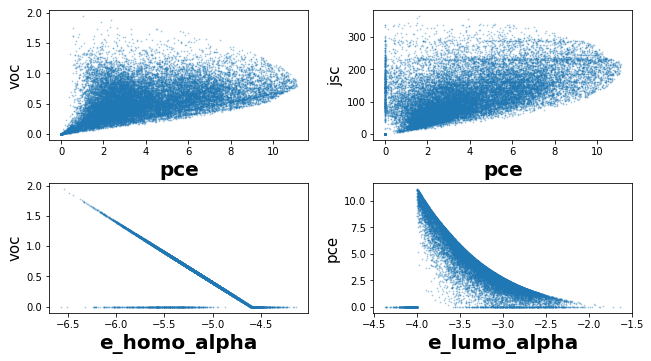

In [4]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 0.4, 0.3])
ax1 = fig.add_axes([0, 0.4, 0.4, 0.3])
ax2 = fig.add_axes([0.5, 0, 0.4, 0.3])
ax3 = fig.add_axes([0.5, 0.4, 0.4, 0.3])

lst = ['pce', 'voc', 'jsc', 'e_homo_alpha', 'e_lumo_alpha']

ax1.scatter(lst[0], lst[1], s = 0.7, alpha = 0.3, data = data)
ax1.set_xlabel(lst[0], fontweight='bold', fontsize = 20)
ax1.set_ylabel(lst[1], fontsize=15)

ax3.scatter(lst[0], lst[2], s = 0.7, alpha = 0.3,data = data)
ax3.set_xlabel(lst[0], fontweight='bold', fontsize = 20)
ax3.set_ylabel(lst[2], fontsize=15)

ax.scatter(lst[3], lst[1], s = 0.7, alpha = 0.3,data = data)
ax.set_xlabel(lst[3], fontweight='bold', fontsize = 20)
ax.set_ylabel(lst[1], fontsize=15)

ax2.scatter(lst[4], lst[0], s = 0.7, alpha = 0.3,data = data)
ax2.set_xlabel(lst[4], fontweight='bold', fontsize = 20)
ax2.set_ylabel(lst[0], fontsize=15)

There are five terms (`pce`, `voc`, `jsc`, `e_homo_alpha`, `e_lumo_alpha`) relavent to photovoltaic materials. Those five terms stand for as below: 
* Percent conversion efficiency (`pce`): The ratio between the useful output of an energy conversion machine and the input. See below. 
* Open circuit potential (`voc`): The maximum voltage available from a solar cell, and this occurs at zero current.
* Short circuit current density (`jsc`): The current density through the solar cell when the voltage across the solar cell is zero (i.e., when the solar cell is short circuited)
* Highest occupied molecular orbital (`e_homo_alpha`): The highest energy molecular orbital that has any electrons in it.
* Lowest unoccupied molecular orbital (`e_lumo_alpha`): The next highest energy orbital (it will be empty). The LUMO is the lowest energy place to put or excite an electron. (`Chemistry 301`, https://ch301.cm.utexas.edu/section2.php?target=imfs/mo/homo-lumo.html) 

The terms are related each other such that 
$$ pce = 100 * \frac{voc*ff*jss}{pin}, $$
where `ff` is fill factor. 



`Size` of figure is set to (10, 7) so that the 4 plots could be accommodated. There are 4 axes defined for these four plots with different locations: upper left, upper right, lower left, and lower right. The five terms described above, are listed in a `list` so that each plot can call the individual term by `index` rather than the `string name`. `Size` and `transparence` of the dot in each plot are defined in addition to the `font size` and `font weight` of labels. 

## DNC: Begin Part 2

### Part 2: Contour plots of a free energy surface

* Use the `ALA2fes.dat` file to create a contour plot of the alanine dipeptide $\Phi$ vs $\Psi$ free-energy surface. Guidelines and information: 
    * The energy scale in the data input file is on kJ/mol and the free-energy surface (FES) was collected at a temperature of 300K: 
    * You should create a contour plot that draws contour lines spaced every kT in energy and stops drawing contours once all of the features can be clearly seen. 
        * This is a slightly different visualization than what we drew in class which used shaded coloring to draw the contours 
    * Annotate the cell so I can follow all the steps you are doing. The final energy plot need not be in kJ/mol (you can convert it to other energy or use units of kT if you prefer.
    * Make sure to have titles, axis labels, something that denotes the value of the contours
    * Optional but encouraged, use greek letters for the axes labels

Now let's read a `.dat` file using `regex` notation.

In [5]:
column_names = ['phi', 'psi', 'free_energy', 'der_phi', 'der_psi']
df = pd.read_csv( 'ALA2fes.dat', sep='\s+', header=None, skiprows=9, names = column_names)
df.head()
df.shape

(2500, 5)

Since the inputs are in kJ/ mol which is kT ($kT = 1 kJ/ mol$ at 300K). 

In [6]:
df.head()

,phi,psi,free_energy,der_phi,der_psi
0,-3.141593,-3.141593,4.838919,-20.089106,7.045216
1,-3.015929,-3.141593,2.726201,-14.287727,7.912178
2,-2.890265,-3.141593,1.471803,-6.391128,8.497256
3,-2.764602,-3.141593,1.242827,1.404448,9.011949
4,-2.638938,-3.141593,1.839741,6.653277,9.628476


Let's plot them to see the pattern with a scatter plot. 

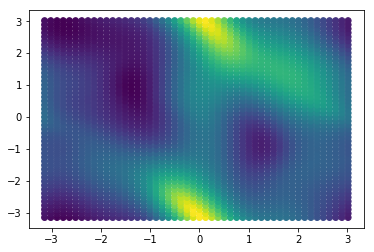

In [7]:
plt.scatter('phi', 'psi', c='free_energy', data=df)

`plt.contour` expects a 2d array for z, instead of a 1d array of values. So let's `interpolate`!

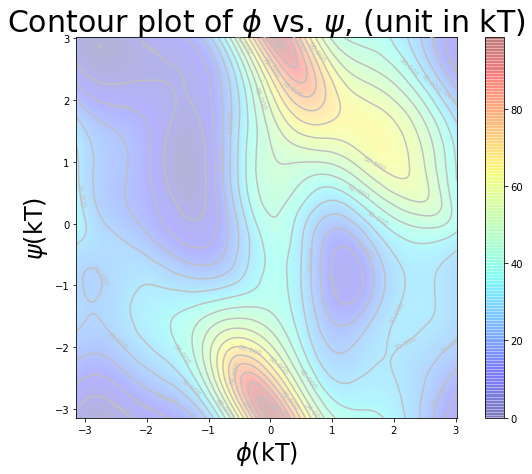

In [10]:
fig = plt.figure(figsize=(10, 7))
x = df.iloc[:,0].values
y = df.iloc[:,1].values
z = df.iloc[:,2].values

N = 500
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()

xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

contours = plt.contour(xi, yi, zi, 18, colors='silver')
plt.clabel(contours, inline=False, fontsize=7)
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='grey', cmap=plt.cm.jet, alpha=0.3)
plt.title('Contour plot of $\phi$ vs. $\psi$, (unit in kT)', size=30)
plt.xlabel('$\phi$' +'(kT)', size=24)
plt.ylabel('$\psi$' +'(kT)', size=24)
plt.colorbar()
plt.show()